<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/CNN_Examples/LeNet_MNIST_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement the LeNet architecture for classification of CIFAR10 data.

In [42]:
# import libraries
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard


In [43]:
# Load the CIFAR10 dataset using the cifar10.load_data() function.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [44]:
# Normalize the pixel values to the range [0, 1] using the astype() method.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [45]:
# Reshape the input data to have a single channel using the reshape() method.
# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [46]:
# Convert the labels to one-hot encoding using the to_categorical() function.
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [47]:
# Define the class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


ValueError: high <= 0

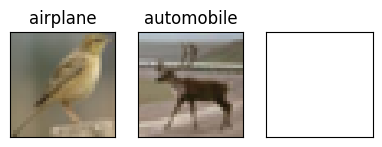

In [58]:
fig = plt.figure(figsize=(8,3))

num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(0, features_idx.shape[0])
    #im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)


In [49]:
# Define the LeNet model architecture using the Sequential() function and 
# add convolutional, average pooling, and dense layers using the 
# Conv2D(), AveragePooling2D(), Flatten(), and Dense() functions.
model = Sequential([
    Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Flatten(),
    Dense(120, activation = 'relu', kernel_initializer='he_normal'),
    Dense(84, activation = 'relu', kernel_initializer='he_normal'),
    Dense(10, activation = 'softmax', kernel_initializer='he_normal')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [50]:
# Compile the model using the compile() method and 
# specify the optimizer, loss function, and metrics to use during training.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [51]:
# set callback
def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 150:
        return 0.005
    return 0.001

tb_cb = TensorBoard(log_dir='./LeNet_CIFAR10_graph', histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr,tb_cb]


In [52]:
# Train the model using the fit() method and specify the number of epochs to train for and the batch size to use.
# model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

model.fit(x_train, y_train,
            batch_size=128,
            epochs=120,
            callbacks=cbks,
            validation_data=(x_test, y_test),
            shuffle=True)

Epoch 1/120
391/391 [==============================] - 5s 13ms/step - loss: 1.7873 - accuracy: 0.3328 - val_loss: 1.5853 - val_accuracy: 0.4133 - lr: 0.0100
Epoch 2/120
391/391 [==============================] - 5s 12ms/step - loss: 1.5435 - accuracy: 0.4343 - val_loss: 1.5020 - val_accuracy: 0.4541 - lr: 0.0100
Epoch 3/120
391/391 [==============================] - 4s 11ms/step - loss: 1.4743 - accuracy: 0.4675 - val_loss: 1.5053 - val_accuracy: 0.4592 - lr: 0.0100
Epoch 4/120
391/391 [==============================] - 5s 12ms/step - loss: 1.4303 - accuracy: 0.4823 - val_loss: 1.4706 - val_accuracy: 0.4675 - lr: 0.0100
Epoch 5/120
391/391 [==============================] - 5s 12ms/step - loss: 1.4024 - accuracy: 0.4967 - val_loss: 1.4733 - val_accuracy: 0.4819 - lr: 0.0100
Epoch 6/120
391/391 [==============================] - 4s 11ms/step - loss: 1.3602 - accuracy: 0.5144 - val_loss: 1.4176 - val_accuracy: 0.4987 - lr: 0.0100
Epoch 7/120
391/391 [==============================] - 4s 

In [53]:
# save model
model.save('LeNet_CIFAR10.h5')

In [54]:
# Evaluate the model on the test set using the evaluate() method and print the test accuracy.
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.3049 - accuracy: 0.4901
Test Loss:  2.30488920211792
Test Accuracy: 0.4900999963283539


1/1 [==============================] - 0s 36ms/step


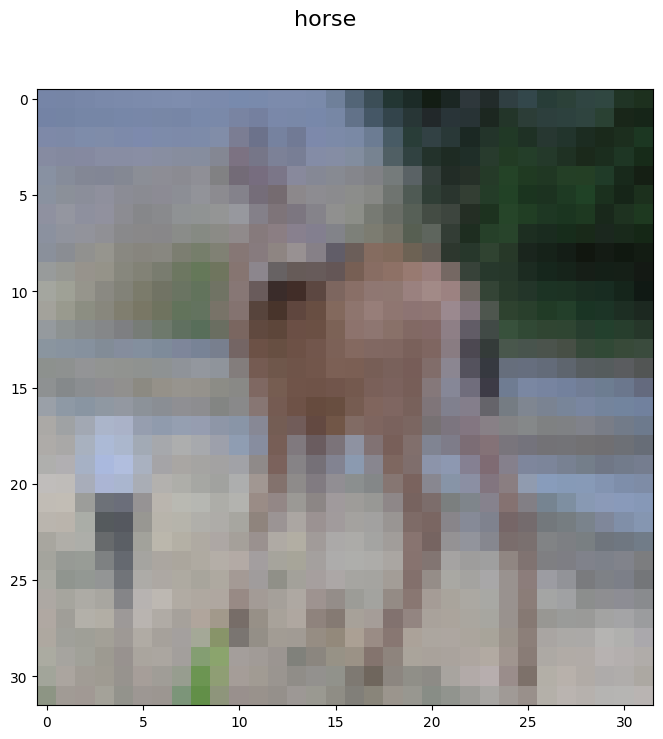

In [55]:
# One image prediction
image_index = 100
pred = model.predict(x_test[image_index,::].reshape(1, 32, 32, 3))
    
#im = np.transpose(x_test[image_index,::], (1, 2, 0))
im = x_test[image_index,::]

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle(class_names[np.argmax(pred)], fontsize=16)
plt.imshow(im)

313/313 [==============================] - 1s 2ms/step


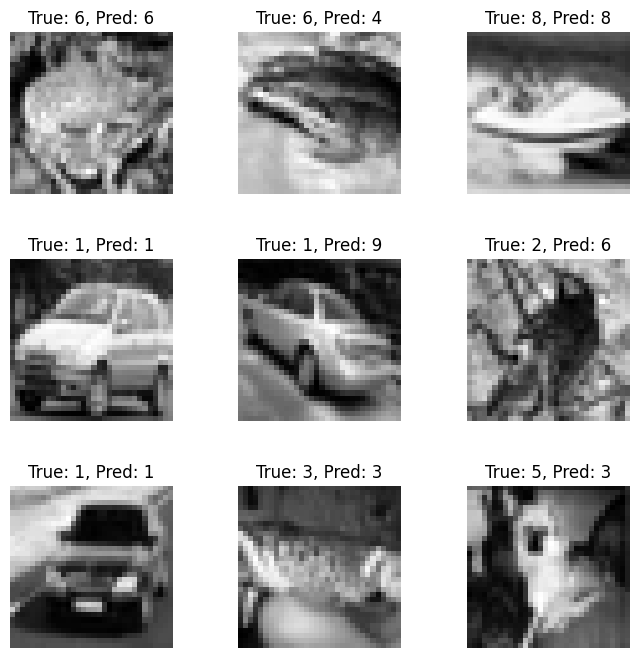

In [56]:
# Display a few example plots of test results
# Get the predicted labels for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Display a few example plots of test results
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()
for i in range(9):
    idx = np.random.randint(0, len(x_test))
    axs[i].imshow(x_test[idx, :, :, 0], cmap="gray")
    axs[i].set_title(f"True: {np.argmax(y_test[idx])}, Pred: {y_pred[idx]}")
    axs[i].axis("off")
plt.show()


In [57]:


# Reshape the input data to have a single channel

# Convert the labels to one-hot encoding

# Define the LeNet model architecture

# Compile the model

# Train the model

# Evaluate the model on the test set

